## Лабораторная работа 1. Знакомство с основными библиотеками и понятиями анализа данных

Постарайтесь оформить всю работу как один монолитный рассказ/отчет. Избегайте дублирования кода. Избегайте использования циклов, всесто этого ищите готовый алгоритм в пакетах. Подписывайте все графики, а также их оси, если график содержит несколько кривых, то обязательно пользуйтесь легендой. Также неукоснительно соблюдайте PEP8. За несоблюдение этих простейших правил итоговые баллы могут быть снижены безапелляционно.

### 1. (6 баллов) Знакомство с пакетом NumPy

![](http://static.wixstatic.com/media/7b913d_7d27b1ff5fe54cc79c80d2cc0e319d92~mv2.jpg)

Во всех заданиях данного раздела запрещено пользоваться циклами, а также использовать *builtin* функции *map*, *filter*, *zip*. Таким образом все функции в заданиях должны быть реализованы средствами самого пакета *numpy*. Для каждого задания привидите примеры использования реализованных функций. Предварительно полезно "по диагонали" ознакомиться с [документацией пакета](https://docs.scipy.org/doc/numpy-1.13.0/reference/), и детально с классом [numpy.ndarray](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html).

In [1]:
import numpy as np

**1. (2 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и некоторое число *v* и возвращающую ближайший к заданному числу элемент матрицы. Например, для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [2]:
def nearest_value(X, v):
    X = X.flatten()
    # начальные величины
    min_v = X[0]
    min_distance = abs(min_v - v)
    for item in X:
        dist = abs(item - v)
        if dist < min_distance:
            min_distance = dist
            min_v = item
    return min_v

**2. (2 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все её уникальные строки в виде матрицы.

In [3]:
def check_unique(row, unique):
    is_unique = True
    for unique_row in unique:
        if not np.array_equal(row, unique_row):
            is_unique = False
            break
    return is_unique


def get_unique_rows(X):
    unique_ar = np.array([])
    for row in X:
        is_unique = check_unique(row, unique_ar)
        if is_unique:
            if unique_ar.shape == (0,):
                unique_ar = row
            else:
                unique_ar = np.vstack([unique_ar, row])
    return unique_ar

**3. (2 балла)** Реализуйте функцию, которая во входной вещественной матрице *X* находит все значения *numpy.nan* и заменяет их на среднее арифметическое всех остальных элементов. В случае матрицы из одних *numpy.nan* произведите замену на нули.

In [4]:
def nans_to_mean(X):
    mean = np.nanmean(X)
    nan_indices = np.where(np.isnan(X))
    X[nan_indices] = mean
    return X

### 2. (6 баллов) Знакомство с пакетами Pandas и Seaborn

![](https://datasciencelab.files.wordpress.com/2013/11/pandas-drinking-cr.png)

В этом задании вам придется работать с датасетом [Wine dataset](https://archive.ics.uci.edu/ml/datasets/wine), описывающим задачу классификации вин в приведенном ниже признаковом пространстве:

0. Wine class - метка класса (тип вина),
1. Alcohol - содержание спиртов (крепость вина),
2. Malic acid - содержание яблочной кислоты,
3. Ash - количество осадков,
4. Alcalinity of ash - щелчность осадков,
5. Magnesium - содержание магния,
6. Total phenols - общее содержание фенолов,
7. Flavanoids - содержание флаваноидов,
8. Nonflavanoid phenols - содержание нефлаваноидных фенолов,
9. Proanthocyanins - содержание фенольных проантоцианидинов,
10. Color intensity - интенсивность окраски вина,
11. Hue - оттенок вина,
12. OD280/OD315 of diluted wines - концентрация протеинов OD280/OD315,
13. Proline - содержание пролина

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

**1. (1 балл)** Скачайте данные по ссылкам [wine.data1.csv](https://yadi.sk/d/WomRBWgL3Rf4Dm), [wine.data2.csv](https://yadi.sk/d/Pz4kkQEn3Rf4Dk). Исходные данные разбиты на две части, загрузите каждую часть и объедините в один *pandas.DataFrame*. Отобразите первые 10 записей полученной таблицы.

In [6]:
wine_header = wine_header = [
    'Wine class', 'Alcohol', 'Malic acid', 'Ash',
    'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
    ]
wine_data1 = pd.read_csv('wine.data1.csv', names=wine_header)

In [7]:
wine_data2 = pd.read_csv('wine.data2.csv')
wine_data = pd.concat([wine_data1, wine_data2])
wine_data.head(n=10)

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
1,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
2,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
3,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
5,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
6,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
7,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
8,2,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
9,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065


**2. (1 балл) ** Проверьте, все ли строки полученной таблицы уникальны. Если нет, то удалите дубликаты, оставив одну из пар. Есть ли в данных пропуски?

In [8]:
wine_data_no_duplicates = wine_data.drop_duplicates()
orig = len(wine_data)
no_dupl = len(wine_data_no_duplicates)
print("Было: {} строк, стало: {} строк.".format(orig, no_dupl))
if orig == no_dupl:
    print("Ничего не изменилось.")
else:
    print("Стало на {} строк меньше.".format(orig-no_dupl))

Было: 198 строк, стало: 178 строк.
Стало на 20 строк меньше.


** 3. (2 балла)** Соберите основную статистику для таблицы, ответив на следующие вопросы. Сколько объектов в таблице? Какова размерность признакового пространства? Каково распределение объектов каждого из классов? Каковы средние и медианные значения в каждом классе каждого из признаков?

In [9]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 147
Data columns (total 14 columns):
Wine class                      198 non-null int64
Alcohol                         198 non-null float64
Malic acid                      198 non-null float64
Ash                             198 non-null float64
Alcalinity of ash               198 non-null float64
Magnesium                       198 non-null int64
Total phenols                   198 non-null float64
Flavanoids                      198 non-null float64
Nonflavanoid phenols            198 non-null float64
Proanthocyanins                 198 non-null float64
Color intensity                 198 non-null float64
Hue                             198 non-null float64
OD280/OD315 of diluted wines    198 non-null float64
Proline                         198 non-null int64
dtypes: float64(11), int64(3)
memory usage: 23.2 KB


Так как данные с удалёнными дубликатами и данные без них — это одно и то же (потому что в них нет дубликатов), я буду пользоваться оригинальными данными ```wine_data```.

**Ответы:**

В таблице 178 объектов.

Размерность признакового пространства: 13 (=кол-ву признаков).

Значения (средние, медианные) по каждому признаку в каждом классе — ниже.

In [10]:
wine_data[wine_data["Wine class"] == 1].describe()

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000
mean,1.0,13.749692,1.985077,2.464615,17.155385,106.769231,2.834462,2.962308,0.293846,1.885538,5.498769,1.07000,3.161385,1119.800000
std,0.0,0.443311,0.662545,0.225139,2.497000,10.727839,0.335145,0.387104,0.074324,0.408174,1.214337,0.11718,0.361628,216.518129
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.82000,2.510000,680.000000
25%,1.0,13.480000,1.660000,2.300000,16.000000,98.000000,2.600000,2.680000,0.260000,1.620000,4.500000,1.01000,2.870000,990.000000
50%,1.0,13.760000,1.770000,2.450000,17.000000,105.000000,2.850000,2.940000,0.290000,1.860000,5.400000,1.07000,3.100000,1095.000000
75%,1.0,14.100000,1.900000,2.620000,18.800000,115.000000,3.000000,3.230000,0.320000,2.080000,6.250000,1.13000,3.400000,1280.000000
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.28000,4.000000,1680.000000


In [11]:
wine_data[wine_data["Wine class"] == 2].describe()

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,2.0,12.251084,1.890120,2.246024,20.190361,95.192771,2.271084,2.126988,0.361807,1.657229,3.146988,1.073084,2.797831,520.385542
std,0.0,0.526315,1.001005,0.322085,3.338527,17.819870,0.566745,0.775793,0.123507,0.586497,0.957076,0.213122,0.483216,156.158287
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.980000,1.200000,2.000000,18.050000,85.500000,1.890000,1.625000,0.265000,1.350000,2.585000,0.930000,2.450000,407.000000
50%,2.0,12.250000,1.610000,2.230000,19.600000,88.000000,2.200000,2.030000,0.370000,1.630000,2.950000,1.050000,2.840000,495.000000
75%,2.0,12.450000,2.100000,2.420000,22.000000,100.500000,2.560000,2.515000,0.430000,1.925000,3.500000,1.225000,3.150000,627.500000
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [12]:
wine_data[wine_data["Wine class"] == 3].describe()

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,3.0,13.163200,3.370800,2.429600,21.380000,99.220000,1.681600,0.777200,0.447600,1.153800,7.268400,0.68560,1.690800,632.300000
std,0.0,0.523475,1.090083,0.185736,2.221325,10.723406,0.353521,0.289327,0.121648,0.401405,2.350406,0.11725,0.271495,116.825397
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.170000,0.550000,3.850000,0.48000,1.270000,415.000000
25%,3.0,12.812500,2.610000,2.300000,20.000000,90.250000,1.427500,0.580000,0.400000,0.865000,5.310000,0.59000,1.520000,550.000000
50%,3.0,13.165000,3.285000,2.380000,21.000000,97.000000,1.635000,0.685000,0.470000,1.105000,7.400000,0.66500,1.680000,627.500000
75%,3.0,13.515000,4.052500,2.595000,22.875000,106.000000,1.822500,0.900000,0.530000,1.337500,9.152500,0.75750,1.820000,695.000000
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.630000,2.700000,13.000000,0.96000,2.470000,880.000000


**4. (2 балла) ** Постройте попарную зависимость каждого из признаков, используйте *seaborn.pairplot*. Изучите внимательно полученные зависимости. Как вы думаете в каких комбинациях признаков классы хорошо отделяются друг от друга? Какие из признаков являются наиболее значимыми, а какие нет? Какие из признаков коррелированы друг с другом? Все свои ответы поясните. 

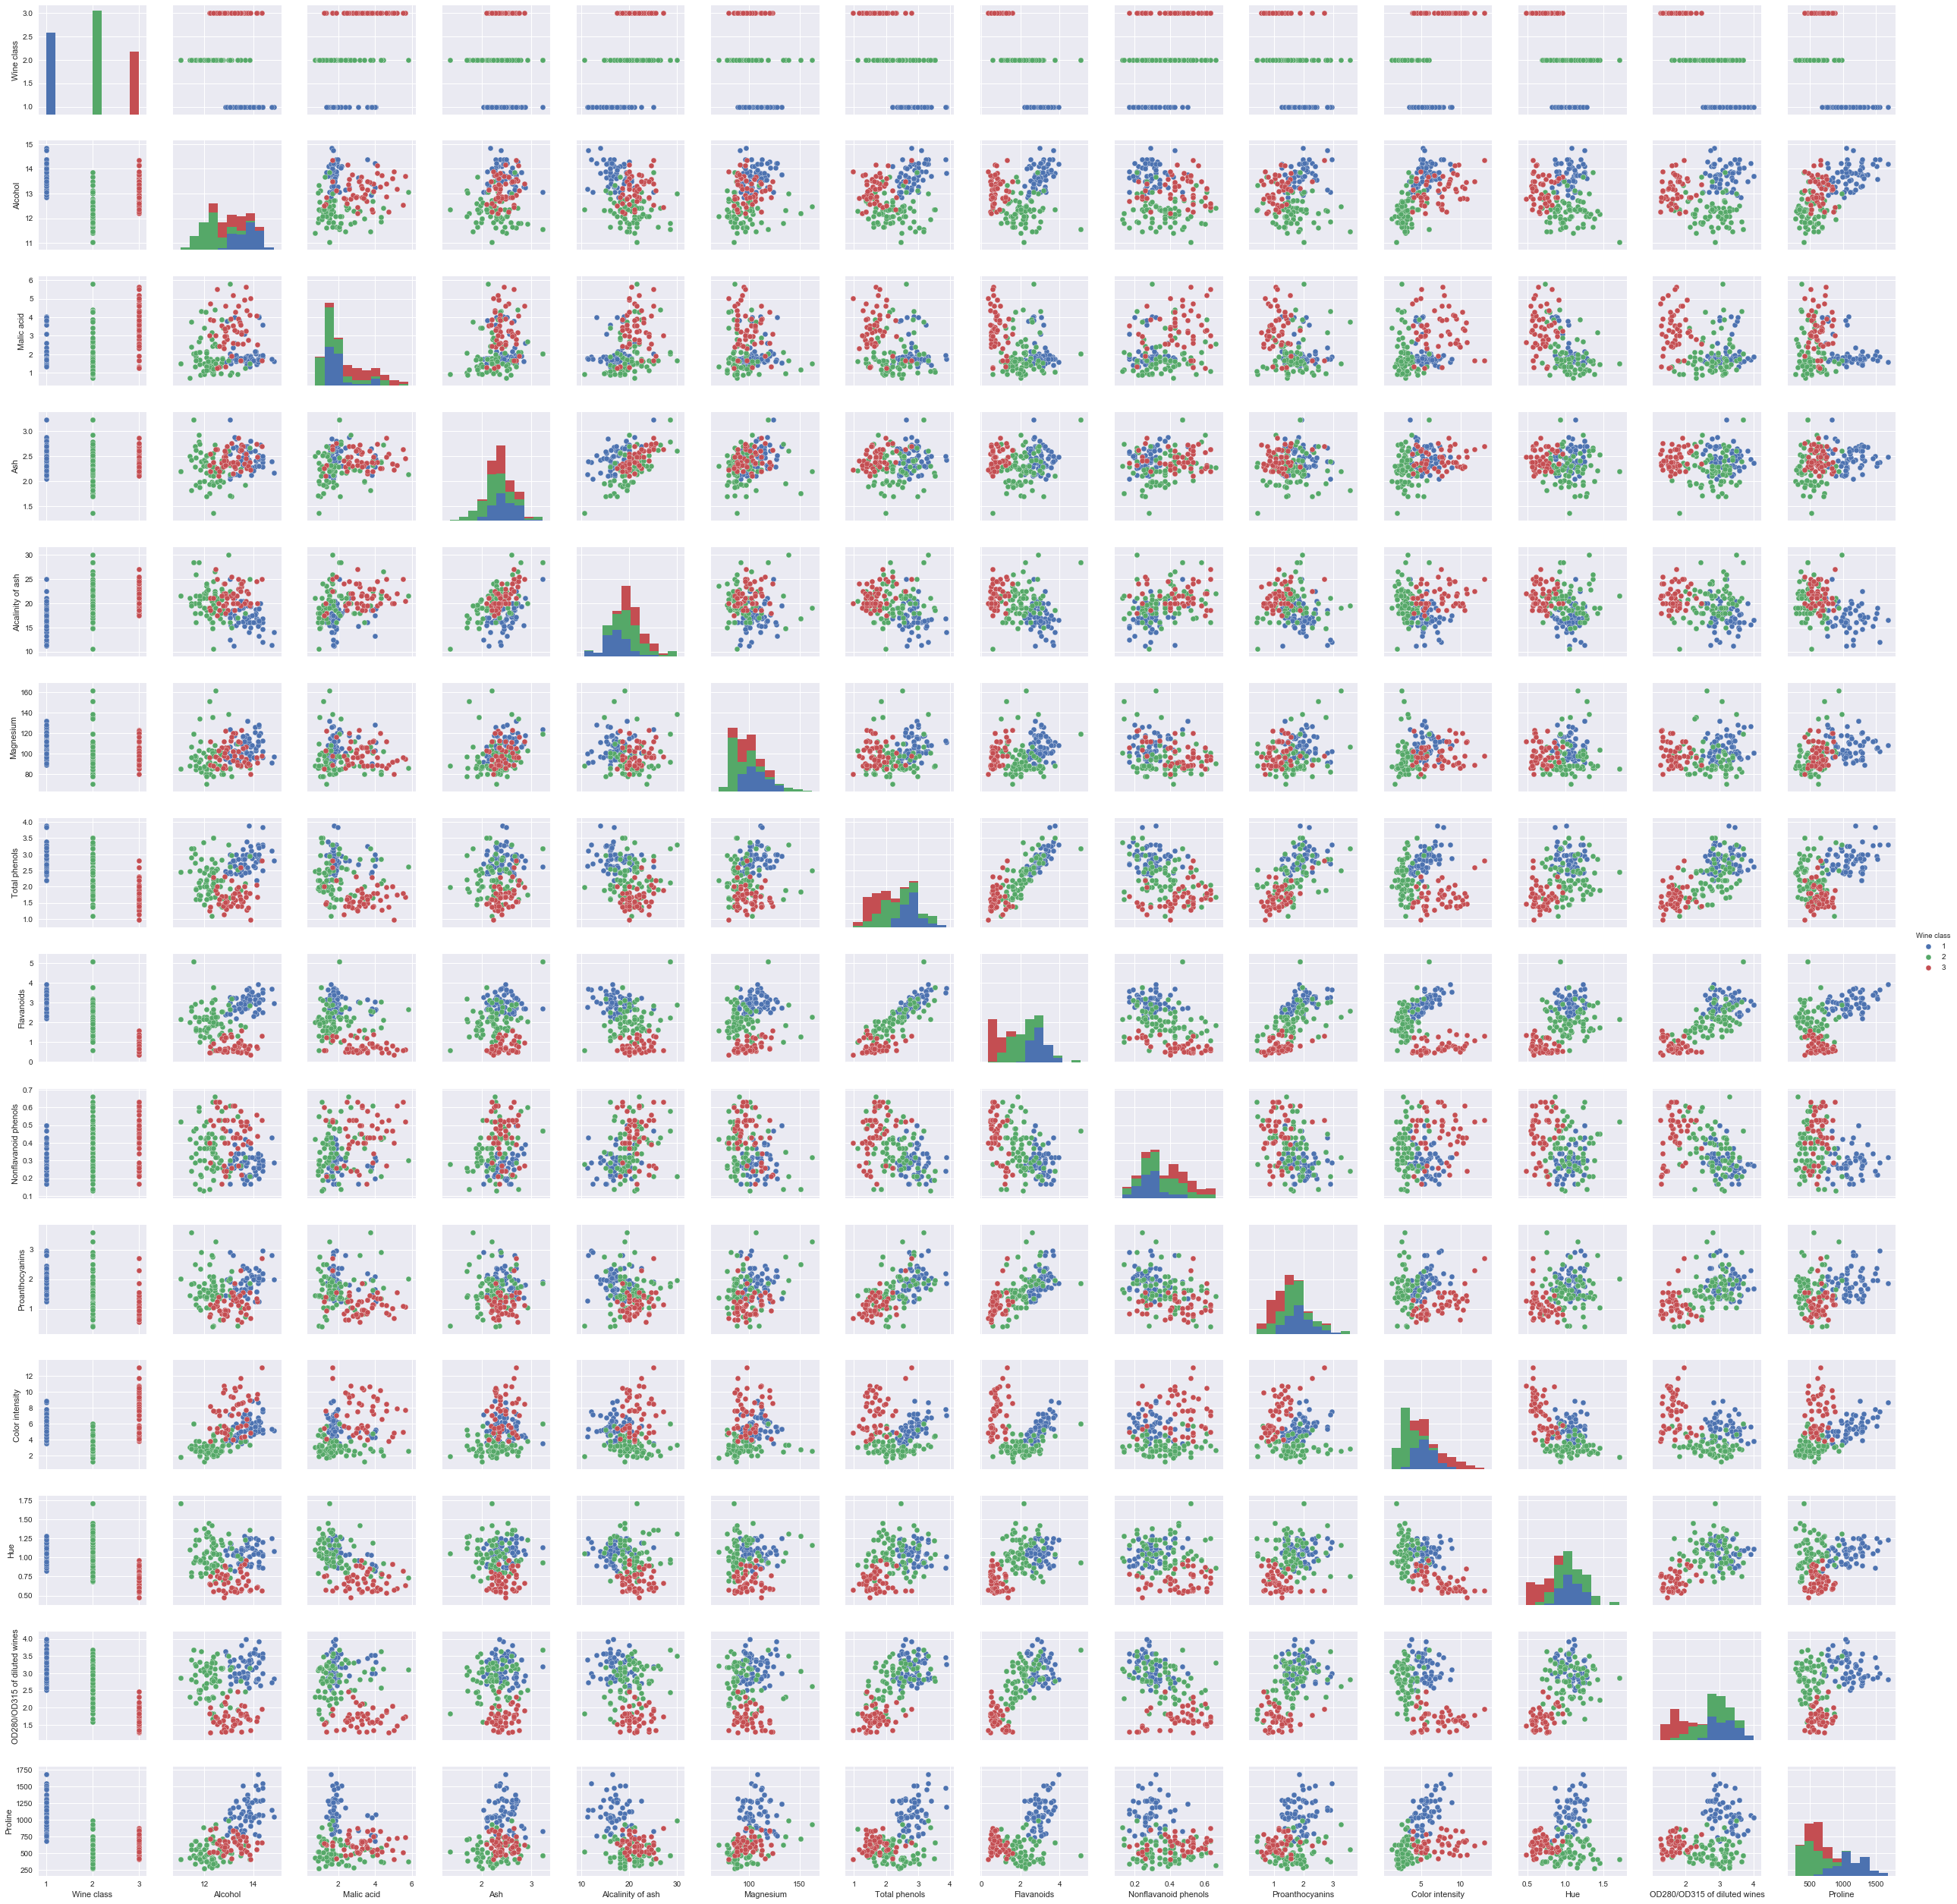

In [13]:
sns.pairplot(wine_data, hue="Wine class")

YOUR ANSWER HERE

### 3. (8 баллов) Знакомство с пакетом Sklearn и алгоритмом kNN

![](http://www.scipy-lectures.org/_images/scikit-learn-logo.png)

В этом задании вам будет предложено продолжить работать с данными Wine dataset. Постарайтесь обойтись без дублирования кода, подготовьте шаблонные функции для построения графиков в заданиях.

** 1. (1 балл)** Преобразуйте данные  к матричному виду *numpy.array*: создайте из *pandas.DataFrame* отдельно матрицу объект-признак и вектор ответов.

In [ ]:
# YOUR CODE HERE

** 2. (2 балла) ** Обучите классификатор *sklearn.neighbors.KNeighborsClassifier* на данных Wine dataset для различных параметров n_neighbors, используя методику *sklearn.model_selection.GridSearchCV*. Постройте график зависимости метрики accuracy от параметра n_neighbors, а также ее $1\sigma-$доверительный интервал. При каком параметре n_neigbors достигается максимальное значение accyracy? Повторите эксперимент для различных параметров cv: 5, 10, 15. Какие выводы можно сделать?

In [ ]:
# YOUR CODE HERE

YOUR ANSWER HERE

**3. (2 балла) ** Можно ли улучшить accuracy, предварительно преобразовав данные? Трасформируйте данные, используя *sklearn.preprocessing.scale*. Повторите эксперимент из предыдущей задачи для преобразованных данных (можно для единственного параметра cv). Улучшился ли результат? Какие выводы можно сделать? 

In [ ]:
# YOUR CODE HERE

YOUR ANSWER HERE

**4. (1 балл) ** Постройте confusion matrix, а также найдите значения метрик: recall, precision, f1-score для лучшего классификатора из предыдущей задачи. Посмотрите в сторону модуля *sklearn.metrics*. Какие выводы можно сделать по полученным значениям метрик?

In [ ]:
# YOUR CODE HERE

YOUR ANSWER HERE

**5. (2 балла) ** В задаче 2.4 вы должны были высказать гипотезу о выжности признаков. Удалите на ваш взгляд неважные признаки, проведите эксперимент предыдущей задачи. Удалите на ваш взгляд самые важные признаки, проведите эксперимент предыдущей задачи. Подтвердились ли вашы гипотезы, сделанные в задаче 2.4?

In [ ]:
# YOUR CODE HERE

YOUR ANSWER HERE

### 4. (10 баллов) Бонусное задание

![](https://i.ytimg.com/vi/FZW-lIorb-8/hqdefault.jpg)

P.S. Leon мне ничего не платит:(

**1. (3 + 2 баллов)** Известно, что метод ближайших соседей неустойчив к шуму. Рассмотрим модельную задачу бинарной классификации с одним признаком и двумя объектами обучающей выборки: $x_1 = 0.1$, $x_2 = 0.5$. Первый объект относится к первому классу, второй - ко второму. Добавим к объектам новый шумовой признак, распределенный равномерно на отрезке $[0, 1]$. Теперь каждый объект описывается уже двумя признаками. Пусть требуется классифицировать новый объект $u=(0,0)$ в этом пространстве методом одного ближайшего соседа (метрика Евклида). Какова вероятность того, что после добавления шума второй объект окажется к нему ближе, чем первый? *Примечание:* задание можно решить теоретически (3 балла), а можно при помощи моделирования [методом Монте-Карло](https://pythonprogramming.net/monte-carlo-simulator-python/) и средствами [numpy.random](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) (2 балла).

**2. (5 баллов)** В алгоритме классификации kNN могут использоваться разные алгоритмы поиска ближайших соседей, различимых с точки зрения вычислительной эффективности. Приведите наиболее известные алгоритмы поиска k ближайших точек в пространстве, выпишите асимптотическую сложность в bigO-нотации для обучения классификатора и для предсказания одного объекта (как для затрат по памяти, так и для машинного времени). Параметры обозначьте как k - количество соседей, n - размерность пространства, M - количество объектов в обучающей выборке. Какие из алгоритмов реализованы в *sklearn.neighbors.KNeighborsClassifier*, какие параметры конструктора за это отвечают?